# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']
<class 'numpy.dtype'>
<class 'numpy.dtype'>
foo 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: order_series, dtype: int64
True order_series
<class 'numpy.dtype'>
<class 'numpy.dtype'>
<class 'numpy.dtype'>
foo 0    1
1    1
Name: order_series, dtype: int64
True order_series
<class 'numpy.dtype'>


In [3]:
geo_data.surface_points.df['order_series']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: order_series, dtype: int64

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

<class 'numpy.dtype'>
<class 'numpy.dtype'>
foo 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: order_series, dtype: int64
True order_series
<class 'numpy.dtype'>
<class 'numpy.dtype'>
<class 'numpy.dtype'>
foo 0    1
1    1
Name: order_series, dtype: int64
True order_series
<class 'numpy.dtype'>


,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


In [5]:
geo_data.surface_points.df['order_series']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: order_series, dtype: int64

In [6]:
geo_data.surface_points.df['order_series'].dtype

dtype('int64')

In [7]:
import pandas as pn
type(geo_data.surface_points.df['order_series'].dtype) is pn.CategoricalDtype

False

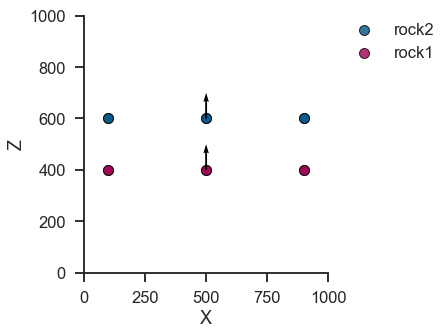

In [8]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [9]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [10]:
interp_data.theano_graph.number_of_points_per_surface_T.get_value()

array([5, 5], dtype=int32)

In [11]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

In [ ]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

In [ ]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                    direction='y', show_data=True)